<a href="https://colab.research.google.com/github/Sitimildaalkan/milda_PCD/blob/main/Salinan_dari_UAS_ML_SitiMilda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project UAS Pembelajaran Mesin

* Nama : Siti Milda Alkan Dawasoka
*   Kelas : TE6A
*   Mata Kuliah : Pembelajaran Mesin






# Studi Kasus :
                                                      

*  Metode : Random Forest
*  Dataset : Air Quality

                         

#Tujuan

Random Forest adalah sebuah algoritma machine learning yang digunakan untuk tugas klasifikasi, regresi, dan pemilihan fitur. Algoritma ini merupakan bagian dari keluarga algoritma ensemble learning, yang menggabungkan prediksi dari beberapa model untuk meningkatkan performa dan ketahanan terhadap overfitting.

Random Forest bekerja dengan cara membangun sejumlah besar pohon keputusan selama pelatihan. Setiap pohon ini dibangun secara acak dengan menggunakan subset acak dari data pelatihan dan subset acak dari fitur pada setiap langkah pemilihan fitur. Proses ini menghasilkan berbagai variasi model, dan hasil prediksi dari masing-masing pohon dijumlahkan atau diambil rata-rata untuk mendapatkan prediksi akhir.

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.datasets import load_wine
dataset = load_wine()
X = dataset.data
y = dataset.target

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [12]:
#Only K-NN Classifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8055555555555556

In [13]:
#Bagging  over our KNN Classifier
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3,oob_score=True)
bag_knn.fit(X_train, y_train)
bag_knn.score(X_test, y_test)

0.7777777777777778

#Now Implement RandomForest

#Import Library

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
import warnings
warnings.filterwarnings('ignore')

#Importing The Dataset

In [16]:
# Load the dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dataset = pd.read_csv('Dubai_Air_Quality.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

#Exploratory Data Analysis

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset (replace 'your_file.csv' with the actual file name)
df = pd.read_csv('Dubai_Air_Quality.csv')

- Deskripsi Dataset

In [18]:
# preview the dataset

df.head()

,Date,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,232.0,NaN,12.4,6.8,82.0,23.9,60.3,68.358340
1,2024-01-01 01:00:00+00:00,244.0,NaN,15.3,7.5,79.0,22.3,57.4,67.695000
2,2024-01-01 02:00:00+00:00,261.0,NaN,19.3,8.6,75.0,22.7,55.8,66.945000
3,2024-01-01 03:00:00+00:00,283.0,NaN,22.9,10.1,72.0,25.3,58.6,66.168335
4,2024-01-01 04:00:00+00:00,317.0,NaN,25.9,12.7,71.0,29.6,64.5,65.356670


In [19]:
df.shape

(8784, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8784 non-null   object 
 1   CO      8784 non-null   float64
 2   CO2     1608 non-null   float64
 3   NO2     8784 non-null   float64
 4   SO2     8784 non-null   float64
 5   O3      8784 non-null   float64
 6   PM2.5   8784 non-null   float64
 7   PM10    8784 non-null   float64
 8   AQI     8784 non-null   float64
dtypes: float64(8), object(1)
memory usage: 617.8+ KB


In [21]:
df.isnull().sum()

,0
Date,0
CO,0
CO2,7176
NO2,0
SO2,0
O3,0
PM2.5,0
PM10,0
AQI,0


#Lakukan data understanding dan data visualization

#Handling categorical missing values

In [22]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Replace missing values with the most frequent category (mode)
for col in categorical_cols:
    mode = df[col].mode()[0]  # Get the most common value
    df[col].fillna(mode, inplace=True)  # Fill missing values

In [23]:
categorical_cols

Index(['Date'], dtype='object')

#Handling numeric missing values

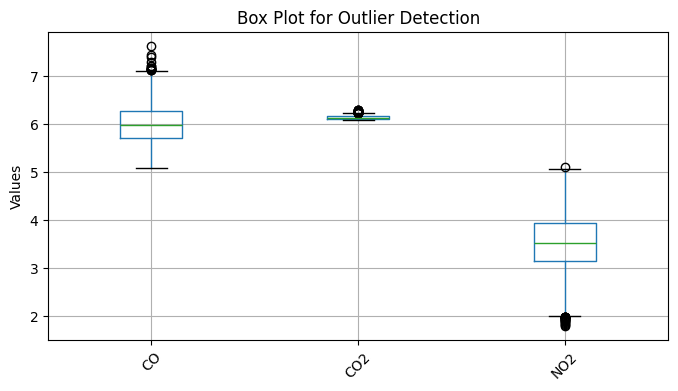

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

features = ['CO', 'CO2', 'NO2']

# Plot box plots
df[features]=np.log(df[features])
df[features].boxplot(figsize=(8, 4))

plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [25]:
import pandas as pd
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)  # Replace nulls with median

In [26]:
# Get columns that contain 'Yr' or 'Year'
year_columns = [feature for feature in numerical_columns if 'Yr' in feature or 'Year' in feature]

# Convert year values into age-related features
for col in year_columns:
    df[col] = df['YrSold'] - df[col]

 # Feature Transformation

In [27]:
import pandas as pd

# Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Identify columns containing zeros
numerical_0s = df.loc[:, (df == 0).any()].select_dtypes(include=['number']).columns

# Remove columns that contain zeros from consideration
numerical_columns = numerical_columns.difference(numerical_0s)

# Calculate skewness for the remaining numerical columns
skewness = df[numerical_columns].skew()

# Set threshold for skewness (e.g., absolute value > 1 indicates high skewness)
skewed_columns = skewness[abs(skewness) > 1]

# Display skewed columns
print("Skewed Columns:")
print(skewed_columns)

Skewed Columns:
AQI     1.118931
CO2     3.354856
PM10    1.660791
SO2     1.462526
dtype: float64


In [28]:
import numpy as np

# The list of highly skewed features identified earlier
skew_features = ['AQI','CO2', 'PM10','SO2']

# Apply log transformation to each skewed feature
for col in skew_features:
    df[col] = np.log(df[col])

#Convert Correlation Heatmap of Numeric Features

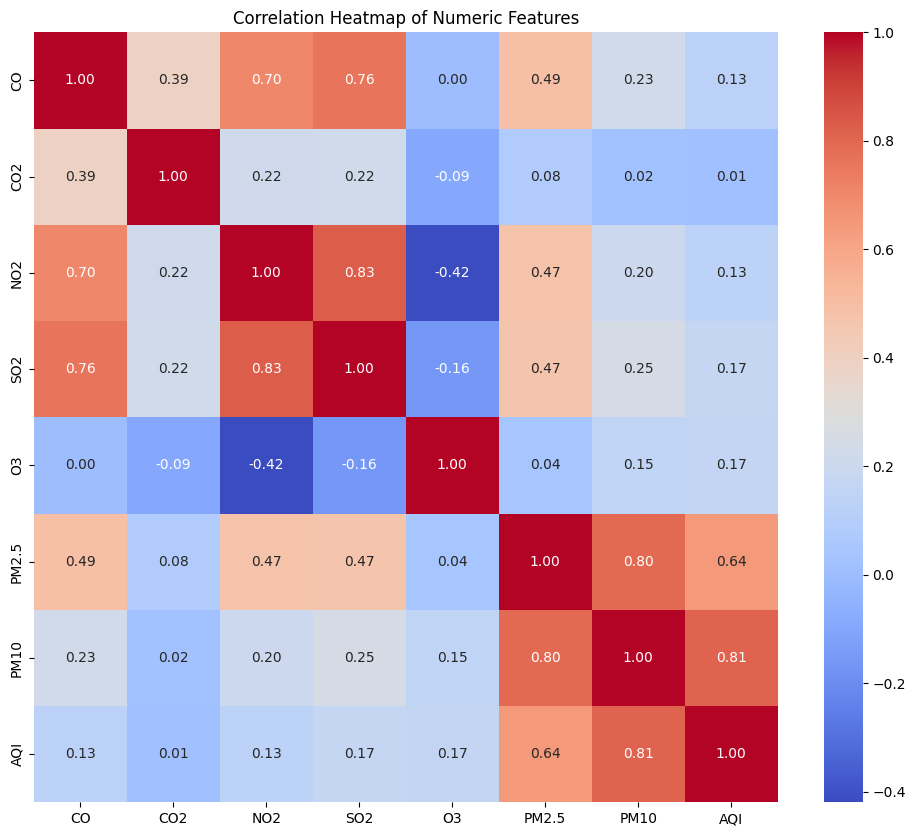

In [29]:
# Select numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])

# Only create the heatmap if there are four or more numeric features
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric features to display a correlation heatmap.')

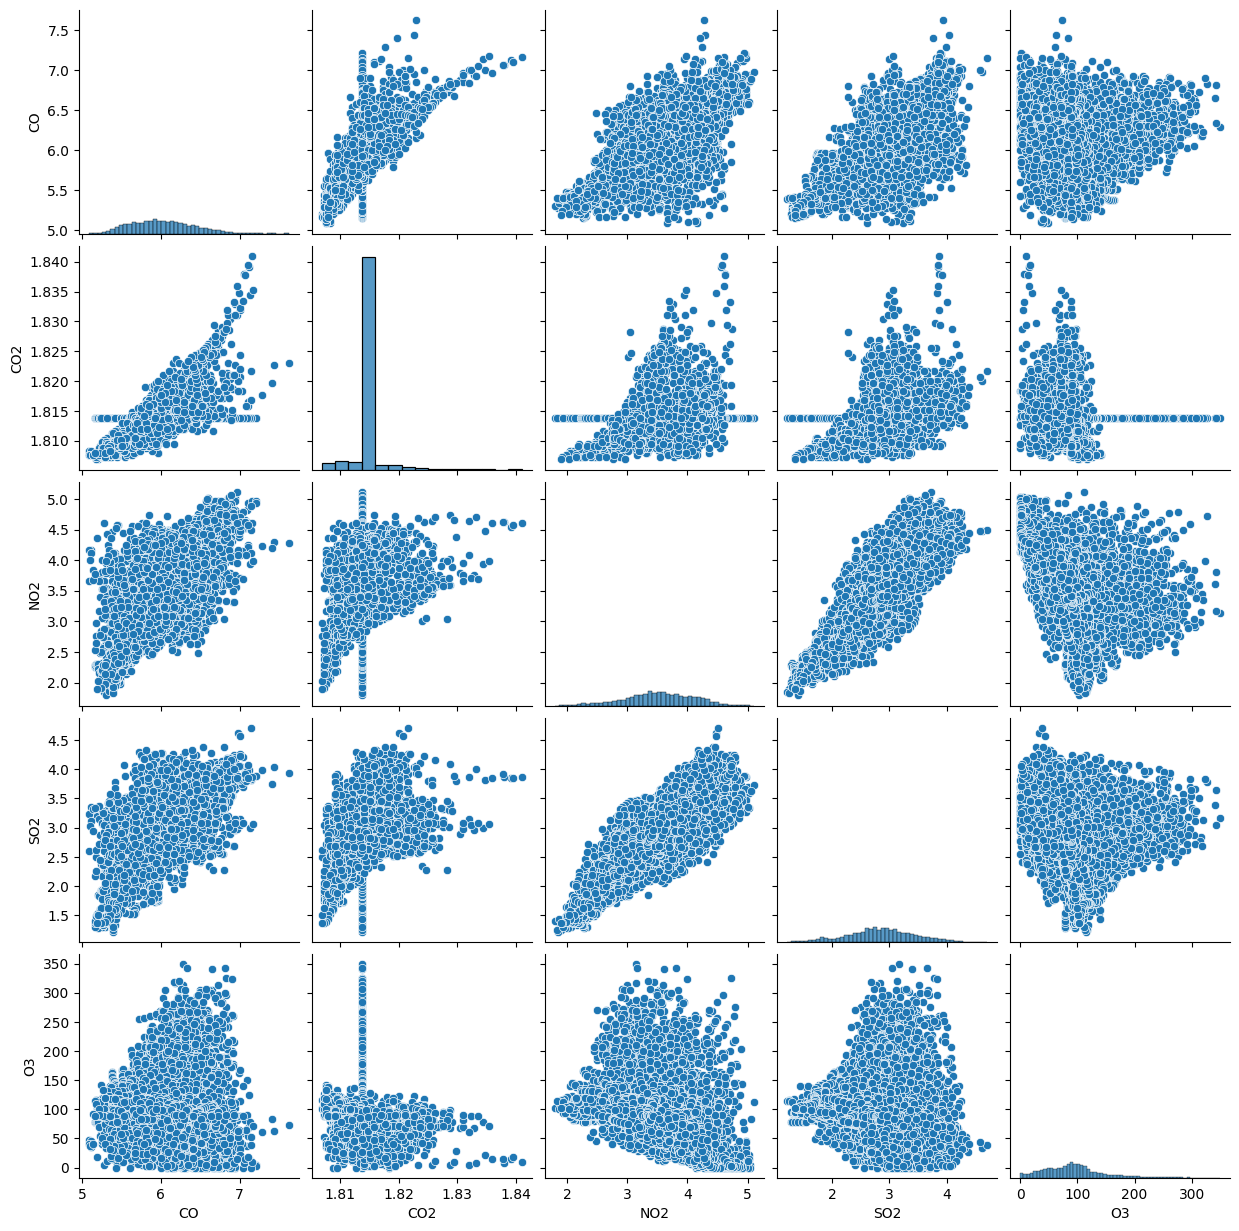

In [30]:
# Pair Plot for selected features (a dry but useful method to spot trends)
sample_features = numeric_df.columns.tolist()[:5]  # limiting to first 5 for practicality
sns.pairplot(df[sample_features])
plt.show()


In [31]:
# Select categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Apply target encoding
for col in categorical_columns:
    # Compute mean SalePrice for each category
    labels_ordered = df.groupby([col])['PM10'].mean().sort_values().index

    # Assign numerical values based on target variable mean
    labels_ordered = {x: i for i, x in enumerate(labels_ordered, 0)}

    # Map encoded values back to the dataframe
    df[col] = df[col].map(labels_ordered)

In [32]:
categorical_columns

Index(['Date'], dtype='object')

In [33]:
df.AQI.unique()

array([4.22476357, 4.21501232, 4.20387139, ..., 4.44496235, 4.4501913 ,
       4.45585778])

#Data Visualization

#Unvariate Analysis

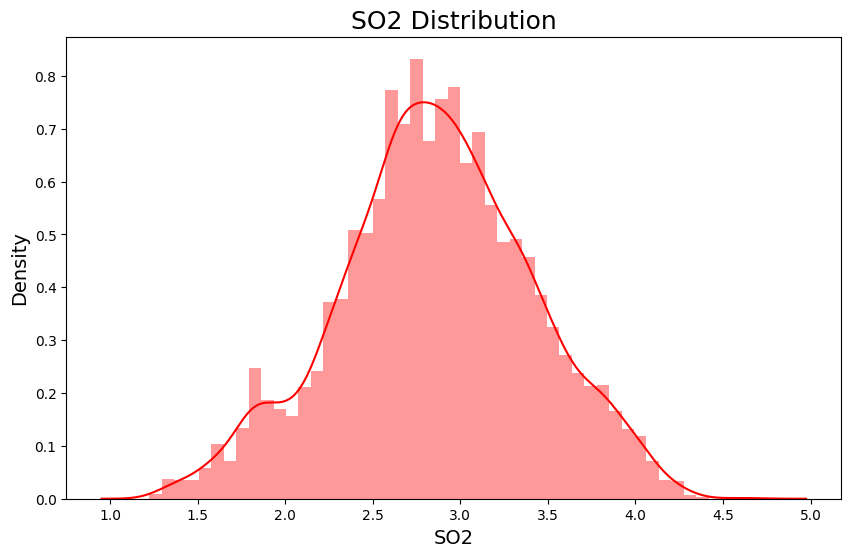

In [34]:
plt.figure(figsize=(10,6))
sns.distplot(df.SO2,color='r')
plt.title('SO2 Distribution',size=18)
plt.xlabel('SO2',size=14)
plt.ylabel('Density',size=14)
plt.show()

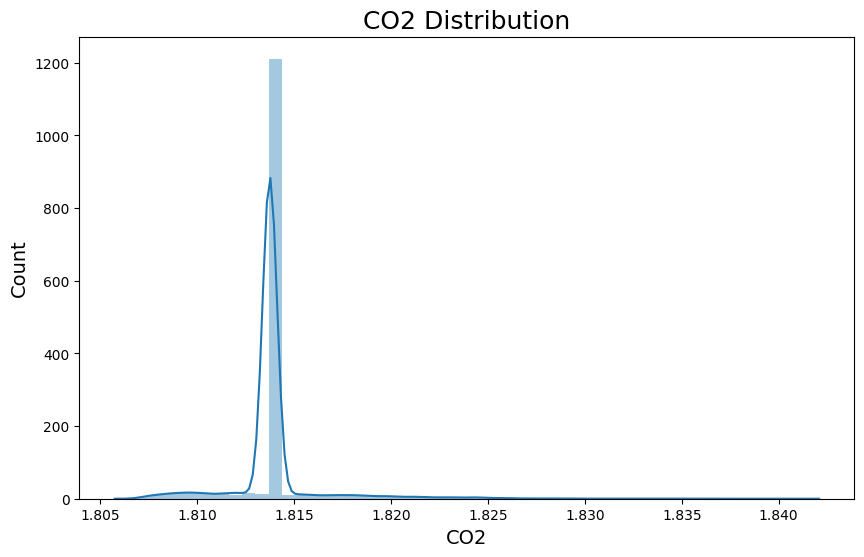

In [35]:
plt.figure(figsize=(10,6))
sns.distplot(df['CO2'])
plt.title('CO2 Distribution',size=18)
plt.xlabel('CO2',size=14)
plt.ylabel('Count',size=14)
plt.show()

#Univariate Analysis for Categorical Features

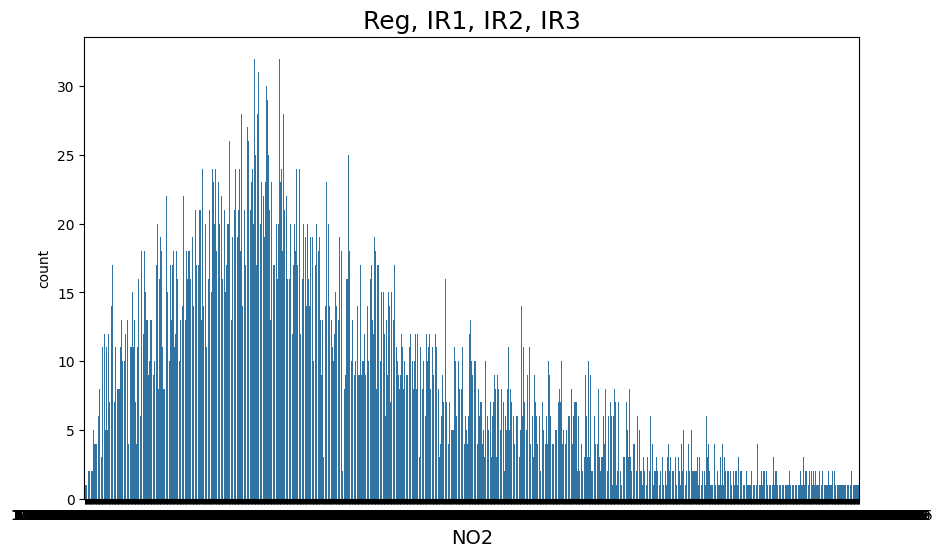

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x='NO2',data=df)
plt.title('Reg, IR1, IR2, IR3', size=18)
plt.xlabel('NO2',size=14)
plt.show()

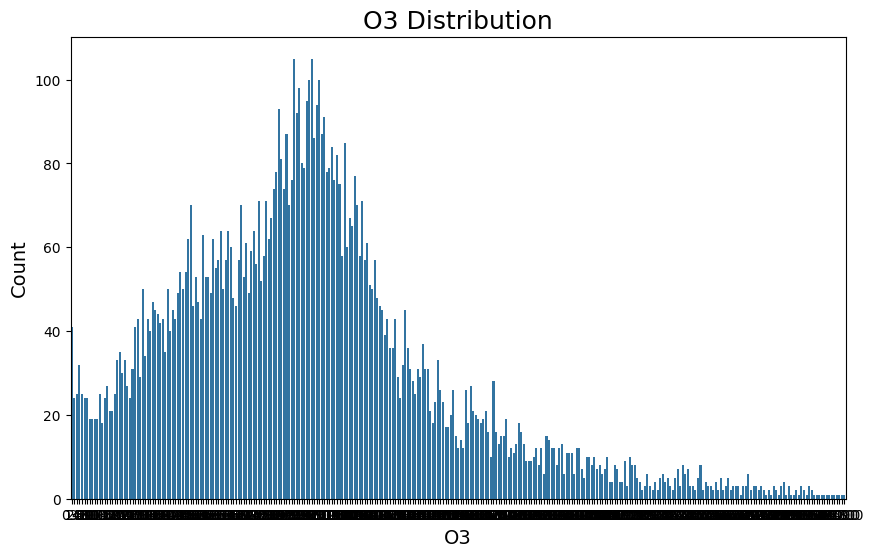

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='O3',data=df)
plt.title('O3 Distribution',size=18)
plt.xlabel('O3',size=14)
plt.ylabel('Count',size=14)
plt.show()

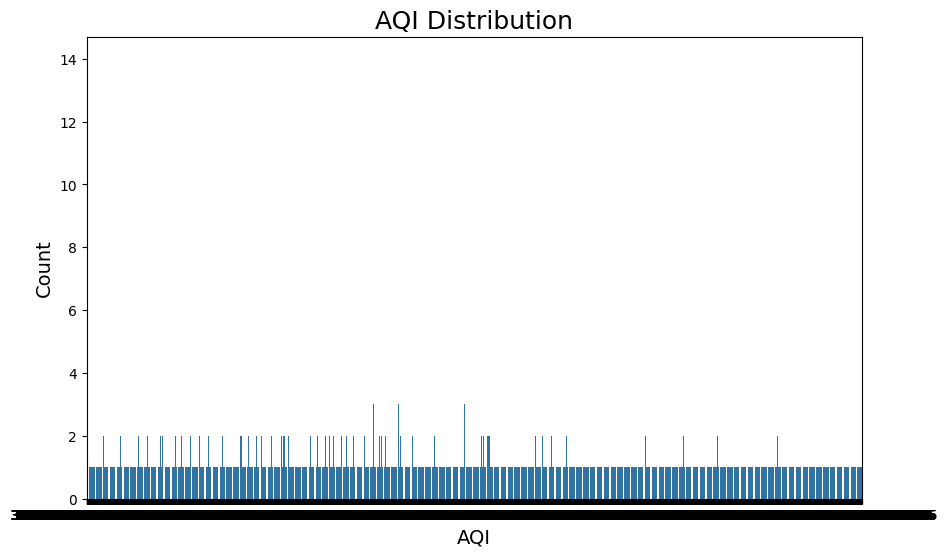

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='AQI',data=df)
plt.title('AQI Distribution',size=18)
plt.xlabel('AQI',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [39]:
df.AQI.value_counts()

,count
AQI,
3.637586,14
3.705409,10
3.828641,10
3.753418,10
3.814043,10
...,...
4.623517,1
4.587549,1
4.571251,1


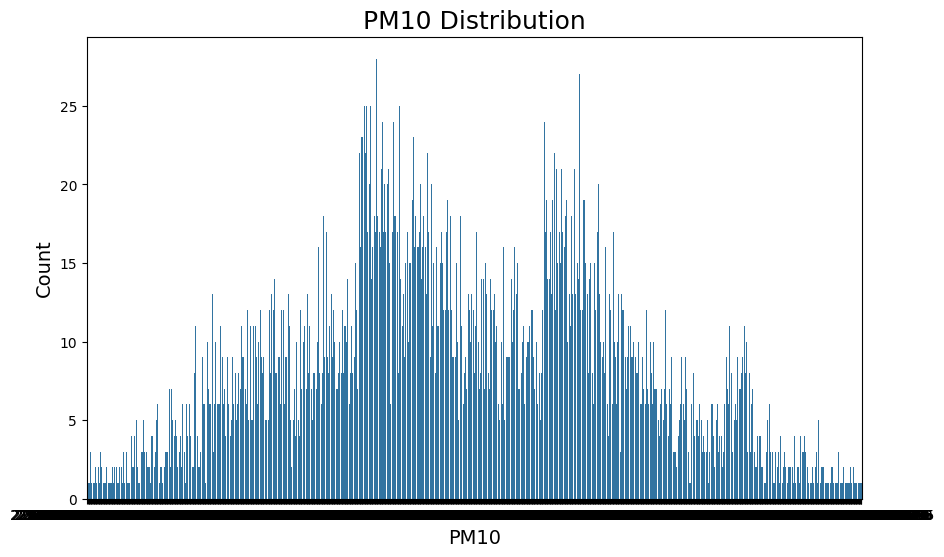

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='PM10',data=df)
plt.title('PM10 Distribution',size=18)
plt.xlabel('PM10',size=14)
plt.ylabel('Count',size=14)
plt.show()

Bivariate Analysis

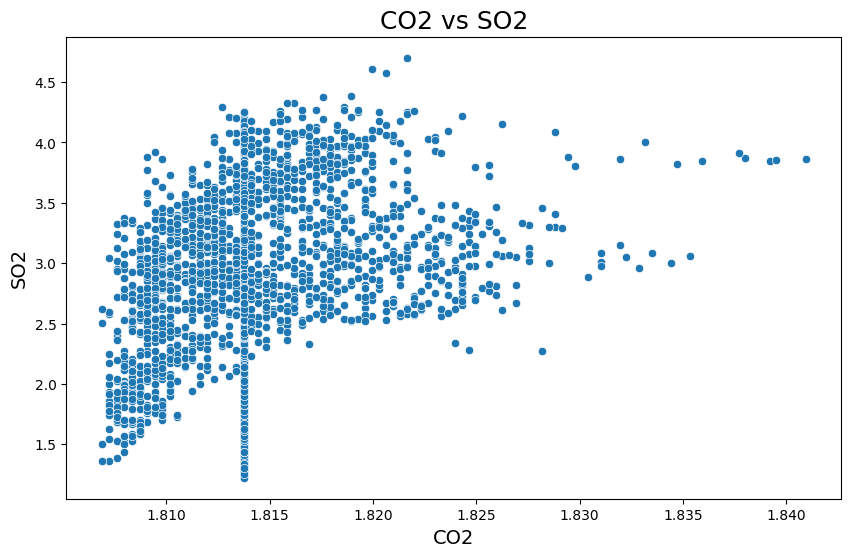

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='CO2',y='SO2',data=df)
plt.title('CO2 vs SO2',size=18)
plt.xlabel('CO2',size=14)
plt.ylabel('SO2',size=14)
plt.show()

Text(0.5, 1.0, 'PM10 vs SO2')

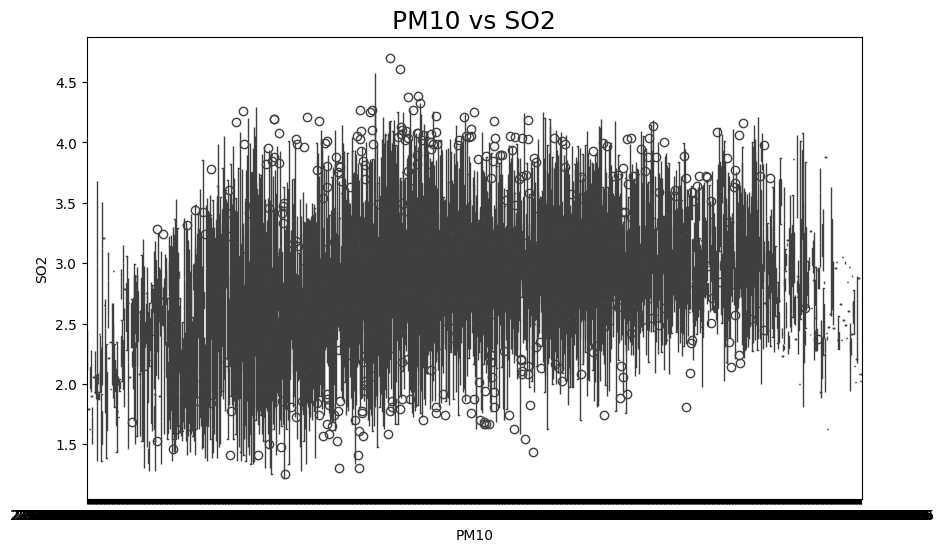

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x='PM10',y= 'SO2',data=df)
plt.title('PM10 vs SO2',size=18)

#Multivariate Analysis

#Handling categorical missing values


In [43]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Replace missing values with the most frequent category (mode)
for col in categorical_cols:
    mode = df[col].mode()[0]  # Get the most common value
    df[col].fillna(mode, inplace=True)  # Fill missing values

#Handling numeric missing values

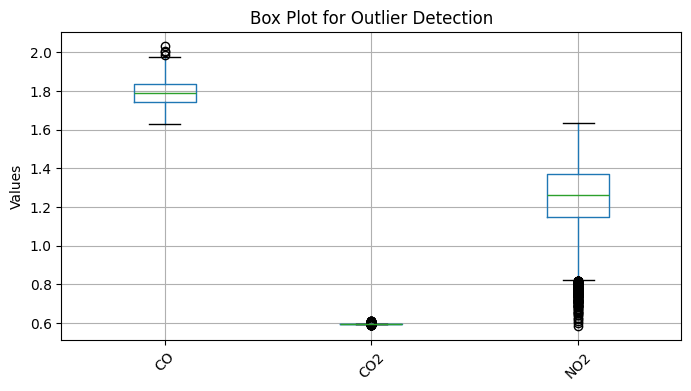

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

features = ['CO', 'CO2', 'NO2']

# Plot box plots
df[features]=np.log(df[features])
df[features].boxplot(figsize=(8, 4))

plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [45]:
import pandas as pd
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)  # Replace nulls with median

#Creating New Features

In [46]:
# Get columns that contain 'Yr' or 'Year'
year_columns = [feature for feature in numerical_columns if 'Yr' in feature or 'Year' in feature]

# Convert year values into age-related features
for col in year_columns:
    df[col] = df['YrSold'] - df[col]

#Feature Transformation

#Feature Engineering

In [48]:
X = df.drop(['AQI'], axis=1)

y = df['AQI']

In [49]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [50]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((5885, 8), (2899, 8))

In [51]:
# check data types in X_train

X_train.dtypes

,0
Date,int64
CO,float64
CO2,float64
NO2,float64
SO2,float64
O3,float64
PM2.5,float64
PM10,float64


In [52]:
X_train.head()

,Date,CO,CO2,NO2,SO2,O3,PM2.5,PM10
6987,2957,1.865857,0.595396,1.445215,3.616309,14.0,39.7,4.216562
2363,4723,1.907610,0.595396,1.513886,3.575151,164.0,57.5,4.561218
5020,6932,1.722485,0.595396,1.081700,2.674149,111.0,34.5,5.049856
6659,3296,1.727687,0.595396,0.975782,2.360854,151.0,29.9,4.282206
1161,3829,1.725757,0.595396,0.842596,1.945910,115.0,27.9,4.383276


In [53]:
import pandas as pd

# Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Identify columns containing zeros
numerical_0s = df.loc[:, (df == 0).any()].select_dtypes(include=['number']).columns

# Remove columns that contain zeros from consideration
numerical_columns = numerical_columns.difference(numerical_0s)

# Calculate skewness for the remaining numerical columns
skewness = df[numerical_columns].skew()

# Set threshold for skewness (e.g., absolute value > 1 indicates high skewness)
skewed_columns = skewness[abs(skewness) > 1]

# Display skewed columns
print("Skewed Columns:")
print(skewed_columns)

Skewed Columns:
CO2    3.273456
dtype: float64


In [54]:
import numpy as np

# The list of highly skewed features identified earlier
skew_features = ['CO', 'CO2', 'SO2', 'NO2', 'AQI']

# Apply log transformation to each skewed feature
for col in skew_features:
    df[col] = np.log(df[col])

#Convert categorical features to numerical values

In [55]:
# Select categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Apply target encoding
for col in categorical_columns:
    # Compute mean SalePrice for each category
    labels_ordered = df.groupby([col])['AQI'].mean().sort_values().index

    # Assign numerical values based on target variable mean
    labels_ordered = {x: i for i, x in enumerate(labels_ordered, 0)}

    # Map encoded values back to the dataframe
    df[col] = df[col].map(labels_ordered)

In [56]:
categorical_columns

Index([], dtype='object')

In [57]:
encoding_maps = {}

for col in categorical_columns:
    labels_ordered = df.groupby([col])['AQI'].mean().sort_values().index
    labels_ordered = {x: i for i, x in enumerate(labels_ordered, 0)}
    df[col] = df[col].map(labels_ordered)
    encoding_maps[col] = labels_ordered  # Simpan hasil encoding tiap kolom

# Tampilkan encoding map untuk semua kolom
for col, mapping in encoding_maps.items():
    print(f"Encoding for {col}:")
    print(mapping)
    print()

#Modelling

#Evaluasi Performance

#Inference model dengan data baru